Analysis:

    -As expected, there is a direct correlation between how close you are to the equator and how hot it tends to be. Locations that are closer to the equator have a much higher maximum temperature than those farther away.
    -There is wider spread of varying humidities than expected. It appears it can be humid far away from the equator as well as close to it. However, in the -20-10 range there does appear to be a higher concentration of higher humidity locations. 
    -Cloudiness does not appear to vary based on distance to or from the equator. It looks like it can be cloudy or clear no matter where you are depending on the day.
    -Wind speed does not appear to be dependent on latitude either, but there does appear to be a larger cluster of low wind speeds at the 40-70 latitude range. 

In [32]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import openweathermapy as owm
import datetime
import seaborn as sn
from citipy import citipy
from config import gkey
from config import api_key

In [8]:
# Randomly generate data from 500+ cities
n = 600
cities = []
codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure there are no repeat cities
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to lists
    cities.append(city.city_name)
    codes.append(city.country_code)
    
codes = [x.upper() for x in codes]

In [9]:
# Create baseline URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Partial URL
query = f"{url}appid={api_key}&units={units}&q="

In [10]:
# Create lists for variable we are looking for 
lat = []
lng = []
temp = []
hum = []
cloud = []
ws = []
date = []


for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{codes[x].upper()}").json()
    
    # Make sure cities with no data get set to NaN
    try:
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        ws.append(response['wind']['speed'])
        date.append(response["dt"])
        
    except KeyError:
        temp.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        hum.append(np.nan)
        ws.append(np.nan)
        date.append(np.nan)
     
    
    # Handle areas that may not have clouds
    try:
        cloud.append(response['clouds']['all'])
    except KeyError:
        cloud.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{codes[x].upper()}")
    
print("Complete!")


Processing record 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=khatanga,RU
Processing record 2 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=belushya guba,RU
Processing record 3 | inta
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=inta,RU
Processing record 4 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=punta arenas,CL
Processing record 5 | velizh
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=velizh,RU
Processing record 6 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=bredasdorp,ZA
Processing record 7 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab5

Processing record 64 | lata
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=lata,SB
Processing record 65 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=grindavik,IS
Processing record 66 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=butaritari,KI
Processing record 67 | halalo
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=halalo,WF
Processing record 68 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=port elizabeth,ZA
Processing record 69 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=tsihombe,MG
Processing record 70 | guilin
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00a

Processing record 121 | sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=sobolevo,RU
Processing record 122 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=tuktoyaktuk,CA
Processing record 123 | dibaya
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=dibaya,CD
Processing record 124 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=petropavlovsk-kamchatskiy,RU
Processing record 125 | owando
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=owando,CG
Processing record 126 | nizhniy kislyay
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=nizhniy kislyay,RU
Processing record 127 | tarhunah
http://api.openweathermap.org/dat

Processing record 179 | kisangani
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=kisangani,CD
Processing record 180 | gardner
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=gardner,US
Processing record 181 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=praia da vitoria,PT
Processing record 182 | poum
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=poum,NC
Processing record 183 | limon
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=limon,HN
Processing record 184 | kyaikkami
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=kyaikkami,MM
Processing record 185 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2

Processing record 237 | rio cuarto
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=rio cuarto,AR
Processing record 238 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=bambous virieux,MU
Processing record 239 | ndele
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=ndele,CF
Processing record 240 | siniscola
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=siniscola,IT
Processing record 241 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=torbay,CA
Processing record 242 | bairiki
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=bairiki,KI
Processing record 243 | kifri
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2

Processing record 293 | portland
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=portland,AU
Processing record 294 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=vila franca do campo,PT
Processing record 295 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=cabo san lucas,MX
Processing record 296 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=tiznit,MA
Processing record 297 | pasighat
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=pasighat,IN
Processing record 298 | kindu
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=kindu,CD
Processing record 299 | pleasant point
http://api.openweathermap.org/data/2.5/weather?

Processing record 350 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=karratha,AU
Processing record 351 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=comodoro rivadavia,AR
Processing record 352 | biak
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=biak,ID
Processing record 353 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=santiago del estero,AR
Processing record 354 | smithers
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=smithers,CA
Processing record 355 | turtkul
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=turtkul,UZ
Processing record 356 | senno
http://api.openweathermap.org/data/2.5/weather?app

Processing record 406 | areosa
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=areosa,PT
Processing record 407 | el pueblito
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=el pueblito,MX
Processing record 408 | aasiaat
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=aasiaat,GL
Processing record 409 | guararapes
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=guararapes,BR
Processing record 410 | sarkand
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=sarkand,KZ
Processing record 411 | pakxe
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=pakxe,LA
Processing record 412 | rio grande
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00

Processing record 463 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=puerto del rosario,ES
Processing record 464 | apam
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=apam,GH
Processing record 465 | nicoya
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=nicoya,CR
Processing record 466 | ozernovskiy
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=ozernovskiy,RU
Processing record 467 | chagda
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=chagda,RU
Processing record 468 | tagusao
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=tagusao,PH
Processing record 469 | sarh
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a

Processing record 522 | touros
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=touros,BR
Processing record 523 | tevaitoa
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=tevaitoa,PF
Processing record 524 | zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=zhigansk,RU
Processing record 525 | warqla
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=warqla,DZ
Processing record 526 | koppa
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=koppa,IN
Processing record 527 | la reforma
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=la reforma,MX
Processing record 528 | etchoropo
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&un

Processing record 580 | maracai
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=maracai,BR
Processing record 581 | havoysund
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=havoysund,NO
Processing record 582 | catamarca
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=catamarca,AR
Processing record 583 | acari
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=acari,PE
Processing record 584 | bartica
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=bartica,GY
Processing record 585 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units=imperial&q=jumla,NP
Processing record 586 | halmstad
http://api.openweathermap.org/data/2.5/weather?appid=c16a1c781097533f2a5d2a17cb00ab56&units

In [11]:
# Create a dataframe of the data
comp_weather_df = pd.DataFrame({
    "City": cities,
    "Latitude": lat,
    "Longitude": lng,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Max Temp": temp,
    "Wind Speed": ws,
    "Date": date,
    "Country": codes
    })
comp_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,khatanga,0,RU,1.529953e+09,61.0,71.98,102.47,60.42,13.67
1,belushya guba,0,RU,NaN,NaN,NaN,NaN,NaN,NaN
2,inta,20,RU,1.529954e+09,67.0,66.04,60.13,68.07,3.49
3,punta arenas,90,CL,1.529950e+09,100.0,-53.16,-70.91,35.60,12.75
4,velizh,56,RU,1.529954e+09,66.0,55.61,31.20,62.22,7.63


In [61]:
#Remove data that has NaN values
clean_weather_df = comp_weather_df.dropna(how="any")
clean_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,khatanga,0,RU,1.529953e+09,61.0,71.98,102.47,60.42,13.67
2,inta,20,RU,1.529954e+09,67.0,66.04,60.13,68.07,3.49
3,punta arenas,90,CL,1.529950e+09,100.0,-53.16,-70.91,35.60,12.75
4,velizh,56,RU,1.529954e+09,66.0,55.61,31.20,62.22,7.63
5,bredasdorp,8,ZA,1.529950e+09,93.0,-34.53,20.04,51.80,6.93


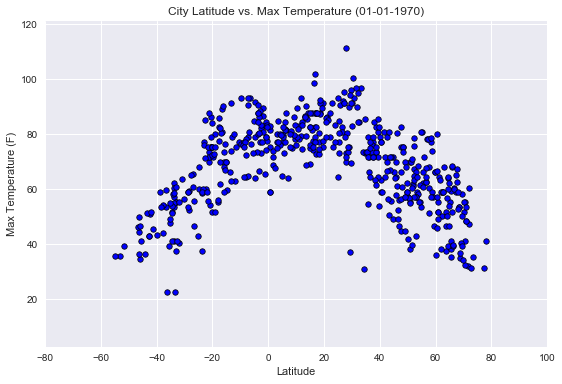

In [57]:
# Set size and style
sn.set()
plt.figure(figsize=(9,6))

# Plot the first graph (lat v. max temp)
plt.scatter(x = clean_weather_df['Latitude'], y = clean_weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=30)

# Change date
weather_dt = pd.to_datetime(clean_weather_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add labels
plt.title(f"City Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set ticks
plt.xlim(-80,100)
plt.ylim(min(clean_weather_df['Max Temp']) - 20, max(clean_weather_df['Max Temp']) + 10)


plt.savefig("Images/lat_maxtemp.png")
plt.show()


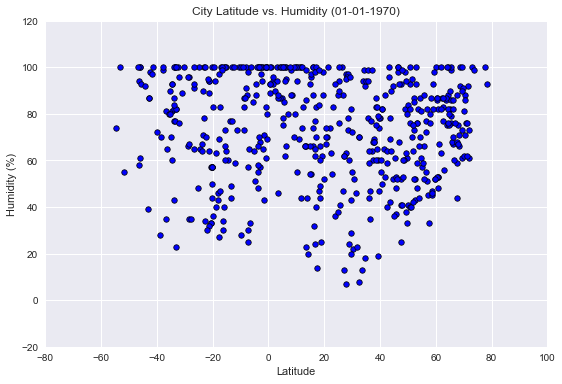

In [58]:
# Set size and style
sn.set()
plt.figure(figsize=(9,6))

# Plot the second graph (lat v. humidity)
plt.scatter(x = clean_weather_df['Latitude'], y = clean_weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=30)

# Change date
weather_dt = pd.to_datetime(clean_weather_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add labels
plt.title(f"City Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set ticks
plt.xlim(-80,100)
plt.ylim(-20, 120)

plt.savefig("Images/lat_humidity.png")
plt.show()

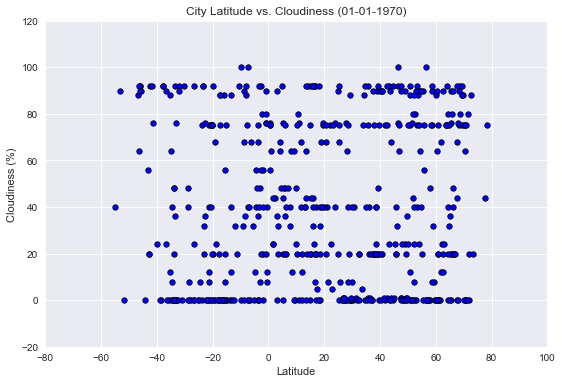

In [59]:
# Set size and style
sn.set()
plt.figure(figsize=(9,6))

# Plot the third graph (lat v. cloudiness)
plt.scatter(x = clean_weather_df['Latitude'], y = clean_weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=30)

# Change date
weather_dt = pd.to_datetime(clean_weather_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add labels
plt.title(f"City Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set ticks
plt.xlim(-80,100)
plt.ylim(-20, 120)

plt.savefig("Images/lat_cloudiness.png")
plt.show()

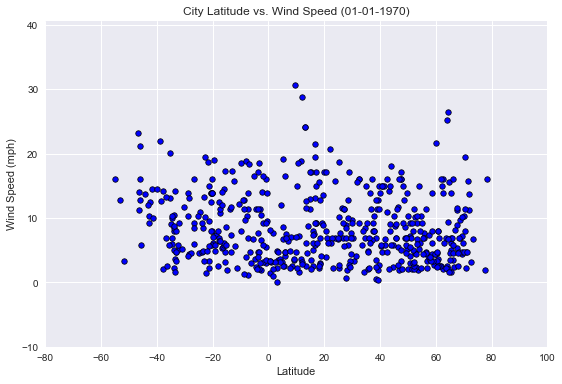

In [60]:
# Set size and style
sn.set()
plt.figure(figsize=(9,6))

# Plot the fourth graph (lat v. wind speed)
plt.scatter(x = clean_weather_df['Latitude'], y = clean_weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=30)

# Change date
weather_dt = pd.to_datetime(clean_weather_df.loc[0,"Date"]).strftime('%m-%d-%Y')

# Add labels
plt.title(f"City Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set ticks
plt.xlim(-80,100)
plt.ylim(-10, max(clean_weather_df['Wind Speed'])+10)

plt.savefig("Images/lat_windspeed.png")
plt.show()